In [1]:
#%%
import networkx as nx
import igraph as ig
import pandas as pd
import seaborn as sns


# get users with most mentions


In [2]:

full_network_path = '/Volumes/boot420/Users/data/climate_network/cop22/networks/cop22_retweets.gml'
topics_file = '/Volumes/boot420/Users/data/climate_network/cop22/cache/topics_cop22.csv'
projected_path = '/Volumes/boot420/Users/data/climate_network/cop22/networks/cop22_reply_projected.gml'

test_network = '/Users/alessiogandelli/dev/internship/tweets-to-topic-network/data/networks/toy_test.gml'

# load network
g = ig.read(full_network_path, format='gml')

topic_name = pd.read_csv(topics_file)

/Users/alessiogandelli/dev/internship/tweets-to-topic-network/venv/lib/python3.9/site-packages/igraph/io/files.py:295: RuntimeWarning: One or more unknown entities will be returned verbatim (&#8217;). at src/io/gml.c:149
  return reader(f, *args, **kwds)


# Full network 

basic info 

In [33]:
# %%
# some statistics about the network
#number of nodes bipartite = 1 (user)

# %%
tweets = g.vs.select(bipartite=1)
user = g.vs.select(bipartite=0)
original_tweets = g.vs.select(is_retweet='original')

print('Number of users: ', len(user))

print('Number of tweets: ', len(tweets))

print('number of original tweets: ', len(original_tweets))

print('user that tweeted original tweets: ', len(set(original_tweets['author'])))




# %%
# outdegree for users 
user_outdegree = g.degree(user, mode='out')
# histogram
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10]
xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Number of users:  134212
Number of tweets:  454754
number of original tweets:  110043
user that tweeted original tweets:  19583


## Users 

In [35]:
# g to dataframe
g.summary()

'IGRAPH D-W- 588966 1360066 -- \n+ attr: author (v), bipartite (v), id (v), is_retweet (v), label (v), text (v), topics (v), date (e), weight (e)'

most mentioned users 

In [4]:
user_outdegree = g.degree(user, mode='out')
user_indegree = g.degree(user, mode='in')
df_user_degree = pd.DataFrame({'user': user['label'], 'mentions': user_indegree, 'tweets': user_outdegree})
df_user_original 
df_user_degree.sort_values(by='mentions', ascending=False).head(20)



,user,mentions,tweets
123,UNFCCC,36729,575
3,pablorodas,20889,7057
38,COP22,20501,851
1870,UN,18900,150
950,UNDP,14355,229
5804,UNICEF,9245,84
2291,UNEP,7914,114
156,WorldBank,6540,134
4168,LeoDiCaprio,4409,1
2010,PEspinosaC,4224,60


users with most tweets 

In [69]:
df_user_degree.sort_values(by='tweets', ascending=False).head(20)

,user,mentions,tweets
3,pablorodas,20889,7057
4,sustainable_4rt,0,1749
121,NiliMajumder,227,1736
19596,ChefFrankraemer,0,1378
19648,EarthMineYours,3,1078
562,_Leah_Green_,6,1074
17871,FractalQuake,10,1040
4599,UNFCCCwebcast,796,988
2173,ineeshadvs,94,862
38,COP22,20501,851


(0.0, 0.8255314580201847)

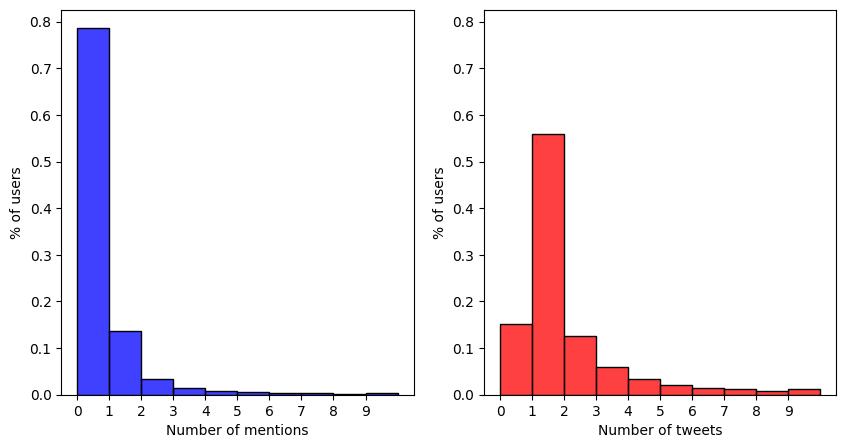

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df_user_degree['mentions'], ax=ax[0], bins=bins, kde=False, color='blue', stat='probability')
sns.histplot(df_user_degree['tweets'], ax=ax[1], bins=bins, kde=False, color='red', stat='probability')
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks)
ax[0].set_xlabel('Number of mentions')
ax[1].set_xlabel('Number of tweets')
ax[0].set_ylabel('% of users')
ax[1].set_ylabel('% of users')
# same y axis
ax[1].set_ylim(ax[0].get_ylim())




## Tweets

most retweeted tweets 

In [5]:
tweets_outdegree = g.degree(tweets, mode='out')
tweets_indegree = g.degree(tweets, mode='in')
df_tweets_degree = pd.DataFrame({'tweet': tweets['label'], 'retweets': tweets_indegree })
# remove one because it is the edge from the user 
df_tweets_degree['retweets'] = df_tweets_degree['retweets'] - 1 

df_tweets_degree.sort_values('retweets', ascending=False).head(20)





,tweet,retweets
12647,800010279136305152,2984
57001,797251350996385792,1166
27156,798922305241903104,1075
63932,796750685068881920,1032
52733,797641421704613888,920
21255,799254916837634048,801
16791,799589038239846401,668
71703,796243139015024641,646
18115,799510718496309248,601
21769,799236513745600512,566


https://twitter.com/LeoDiCaprio/status/800010279136305152
https://twitter.com/WWF/status/797251350996385792
https://twitter.com/Maersk/status/798922305241903104
https://twitter.com/UNICEF/status/796750685068881920

<Axes: xlabel='retweets', ylabel='Probability'>

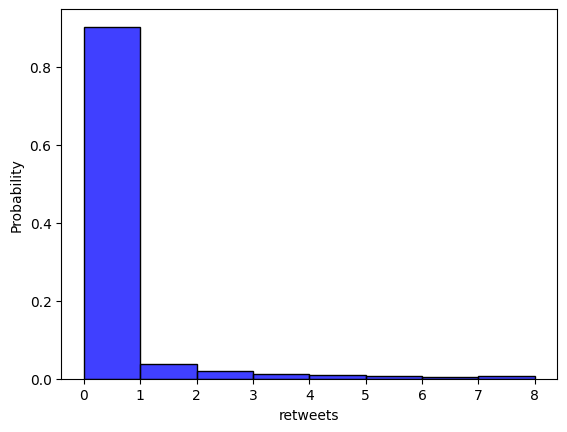

In [73]:
# histoplot 
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]
sns.histplot(df_tweets_degree['retweets'], bins=bins, kde=False, color='blue', stat='probability')

In [9]:
# how many 0 retweets 
print('tweets with 0 retweets: ',len(df_tweets_degree[df_tweets_degree['retweets'] == 0]))

tweets with 0 retweets:  404026


In [7]:
tweets_outdegree = g.degree(original_tweets, mode='out')
tweets_indegree = g.degree(original_tweets, mode='in')
df_tweets_degree = pd.DataFrame({'tweet': original_tweets['label'], 'retweets': tweets_indegree })
# remove one because it is the edge from the user 
df_tweets_degree['retweets'] = df_tweets_degree['retweets'] - 1 

df_tweets_degree.sort_values('retweets', ascending=False).head(20)

,tweet,retweets
12647,800010279136305152,2984
57001,797251350996385792,1166
27156,798922305241903104,1075
63932,796750685068881920,1032
52733,797641421704613888,920
21255,799254916837634048,801
16791,799589038239846401,668
71703,796243139015024641,646
18115,799510718496309248,601
21769,799236513745600512,566


In [8]:
import pandas as pd
import numpy as np
from webcolors import hex_to_rgb
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

s = df_tweets_degree.value_counts('retweets')

original = s.to_dict()
# same keys but values is key * value
rt = {"RT"+str(k): k*v for k, v in original.items()}

node_labels = {**original, **rt}

node_label = list(original.keys()) + list(rt.keys())
node_dict = {v: k for k, v in enumerate(node_label)}
source = original.keys()
target = rt.keys()
value = list(rt.values())

source_node = [node_dict[i] for i in source]
target_node = [node_dict[i] for i in target]

s = df_tweets_degree.value_counts('retweets')

# if retweets > 8 merge all together in one row with retweets values ">8"
tail = s[s.index >= 8].sum()

s = s[s.index < 8]
s.loc[">8"] = tail
s


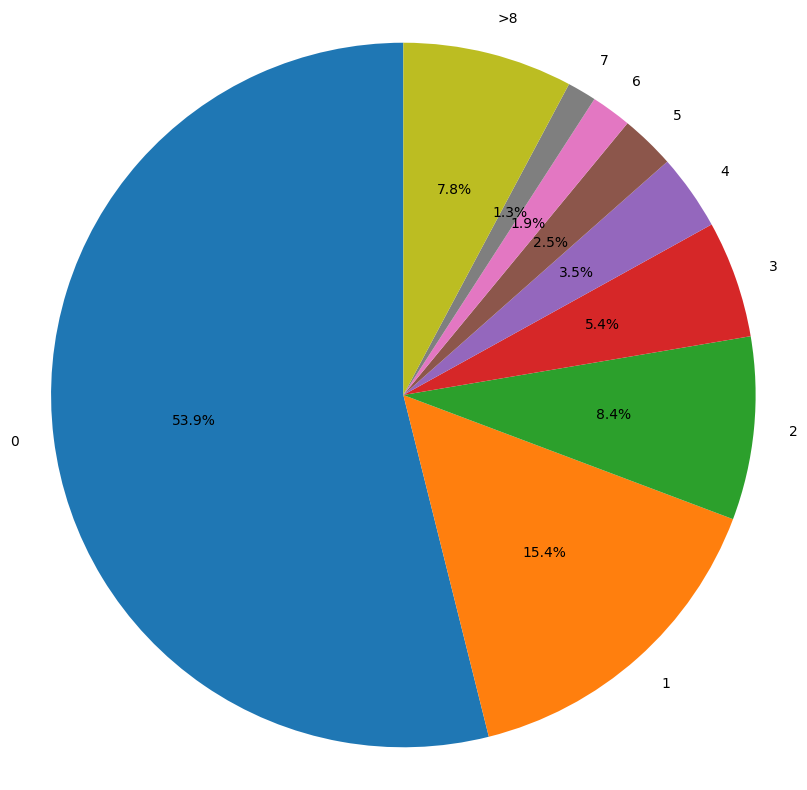

In [19]:
import matplotlib.pyplot as plt

s = df_tweets_degree.value_counts('retweets', normalize=True).mul(100)

# if retweets > 8 merge all together in one row with retweets values ">8"
tail = s[s.index >= 8].sum()

s = s[s.index < 8]
s.loc[">8"] = tail
s



fig, ax = plt.subplots(figsize=(10,10))
ax.pie(s, labels=s.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.show()











In [22]:
#100% stacked bar plot
df_tweets_degree.value_counts('retweets').head(20)

retweets
0     59315
1     16909
2      9246
3      5912
4      3831
5      2752
6      2037
7      1465
8      1165
9       813
10      769
11      535
12      458
13      380
14      362
15      268
16      266
17      229
18      205
19      185
Name: count, dtype: int64

## topics 

In [49]:
topics = g.vs['topics']
label = g.vs['label']
df_topics = pd.DataFrame({'label': label, 'topics': topics})

In [53]:
# drop rows with nan
df_topics = df_topics.dropna()
df_topics['topics'].value_counts()

topics
-1.0     44578
 0.0     18335
 1.0      3412
 2.0      3253
 3.0      2858
         ...  
 93.0      114
 94.0      112
 95.0      112
 96.0      109
 97.0      105
Name: count, Length: 99, dtype: int64

In [55]:
topics_file = '/Volumes/boot420/Users/data/climate_network/cop22/cache/topics_cop22.csv'
topic_name = pd.read_csv(topics_file)

In [56]:
topic_name

,Unnamed: 0,Topic,Count,Name
0,0,-1,44182,-1_2a_tcot_climatecounts_development
1,1,0,18039,0_conflictsofinterest_pollutersout_kick_stopco...
2,2,1,3328,1_renewable_energy_100_renewables
3,3,2,3199,2_climatejustice_justice_champions_climateaction
4,4,3,2835,3_agriculture_food_farmers_foodsecurity
...,...,...,...,...
94,94,93,113,93_ndcpartnership_ndcs_ndc_cpi
95,95,94,112,94_crowdsourced_freewordcentre_cop22poem_words
96,96,95,111,95_lighting_philipslight_akon_energyefficient
97,97,96,109,96_thanking_governors_coast_bold


# projected multilayer network

In [28]:
import uunet.multinet as ml

projected_network_path = '/Volumes/boot420/Users/data/climate_network/cop22/networks/cop22_retweets_ml.gml'

ml = ml.read(projected_network_path)


KeyboardInterrupt: 